In [6]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [97]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    np.set_printoptions(precision=5)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['income_<_50000$', 'income_>_50000$']); ax.yaxis.set_ticklabels(['income_<_50000$', 'income_>_50000 $']) 
    plt.show() 

In [74]:
# read the data
df = pd.read_csv('C:/Users/gomez/OneDrive/Documents/MAG2-MASTER1/projet_machine_learning/adult.data', sep=',')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [75]:
# assign column names
headers_name = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
               "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country","income"]
df.columns = headers_name
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [76]:
df.shape

(32560, 15)

In [77]:
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [81]:

# convert column of target variable to dummies
dummies = pd.get_dummies(df['income'], prefix='Income', drop_first=True)

# concatenate original dataframe with dummies
df_concat = pd.concat([df, dummies], axis=1)
df_concat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Income_ >50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


In [82]:
df_concat.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
Income_ >50K       uint8
dtype: object

In [83]:
# select features and target variable
x = df_concat[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
               "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]]
y = df_concat["Income_ >50K"]

# instantiate the OrdinalEncoder object
#encoder = OrdinalEncoder()
# encode categorical variables 
cols_to_encode = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
x[cols_to_encode] = encoder.fit_transform(x[cols_to_encode])
x[cols_to_encode]

c:\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0
1,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0
2,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0
3,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0
4,4.0,12.0,2.0,4.0,5.0,4.0,0.0,39.0
...,...,...,...,...,...,...,...,...
32555,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0
32556,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0
32557,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0
32558,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0


In [84]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (22792, 14) (22792,)
Test set: (9768, 14) (9768,)


## Logistic Regression (LR)

In [85]:
#Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
parameters ={"C":[0.01,0.1,1],'penalty':['l1','l2'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}# l1 lasso l2 ridge
LR=LogisticRegression()
logreg_cv = GridSearchCV(estimator=LR, cv=10, param_grid=parameters)
logreg_cv.fit(x_train, y_train)

c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: Convergen

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})

In [86]:
#We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and 
# the accuracy on the validation data using the data attribute best_score_
print("Best hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Best hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8235786509934335


In [87]:
print("accuracy :",logreg_cv.score(x_test, y_test))

accuracy : 0.8268837018837019


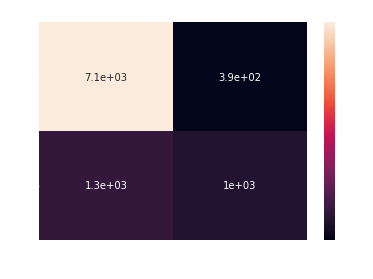

In [98]:
yhat=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

## Support Vector Machine (SVM)

In [99]:
#Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [100]:
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters)
svm_cv.fit(x_train, y_train)

In [ ]:
print("Best hyperparameters :(best parameters) ",svm.best_params_)
print("Accuracy :",svm.best_score_)

In [ ]:
print("accuracy :",svm_cv.score(x_test, y_test))

In [ ]:
yhat=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

In [70]:
# # fit a logistic regression model
# model = LogisticRegression()
# model.fit(x_train, y_train)

# # predict on test set and print accuracy score
# y_pred = model.predict(x_test)
# score = model.score(x_test, y_test)
# print(f'Accuracy score: {score:.2f}')

In [71]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
# print(confusion_matrix(y_test, yhat, labels=[1,0]))